<a href="https://colab.research.google.com/github/Sinis16/202220_Ejemplo_Parcial_Practico_1/blob/master/Talleres/Taller%201/MINE_4206_202510_AML_Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Taller 1**

- **Integrante 1:**
- **Integrante 2:**

### **Problemática**:
El cambio climático, impulsado por la emisión de gases de efecto invernadero como el CO2, está provocando el calentamiento global y un aumento en los desastres ambientales. La contaminación del aire y la pérdida de biodiversidad son algunas de sus consecuencias, lo que hace necesario establecer políticas y planes de gestión de riesgos para mitigar sus efectos. Una de las estrategias clave es la movilidad sostenible, que busca reducir las emisiones de CO2 mediante alternativas como el uso de vehículos eléctricos y bicicletas. Estas medidas no solo contribuyen a disminuir la contaminación, sino que también mejoran la calidad del aire y la salud pública.

En este contexto, los sistemas de alquiler de bicicletas en ciudades han surgido como una solución efectiva para reducir la congestión vehicular y fomentar el transporte ecológico. Sin embargo, uno de sus principales retos es la distribución desequilibrada de bicicletas en las estaciones, lo que afecta su disponibilidad y la satisfacción de los usuarios. Para optimizar su funcionamiento, se requieren soluciones basadas en datos que permitan predecir la demanda en tiempo real, considerando factores como el clima, la hora del día, la ubicación, etc. Esto facilitaría una mejor gestión del sistema, asegurando que las bicicletas estén disponibles en los momentos y lugares adecuados.

### **Objetivos:**

- Aplicar técnicas de regresión para construir un modelo predictivo que permita estimar la demanda sobre el uso de un sistema de alquiler de bicicletas siguiendo el ciclo de machine learning.
- Determinar cuáles son los factores que más inciden en la demanda con base en los datos.


> Nota: Los datos y el diccionario de datos lo pueden encontrar en el [repositorio de github](https://github.com/fcastellanosp/MINE-4206_202510_AML/tree/main/Talleres/Taller%201). No olvidar que la semilla es '77'.

&nbsp;

### **Actividades a realizar:**
1. Exploración y perfilamiento de los datos, utilizando las funcionalidades de la librería pandas. Recuerda que este paso es muy importante para determinar problemas de calidad y tomar decisiones relacionadas con la preparación de los datos para el algoritmo de aprendizaje.

2.	Limpieza y preparación de los datos, justificando las decisiones tomadas con base en los resultados obtenidos en el paso anterior.

3.	Construcción de un modelo de regresión polinomial. Para determinar el grado de la transformación polinomial emplea las técnicas de selección de modelos sobre los siguientes valores de grado de polinomio: `[2, 3]`. Utiliza para la selección la métrica RMSE.

4.	Construcción de un modelo de regresión regularizada Lasso. Para determinar el valor del hiperparámetro de regularización utiliza las técnicas de selección de modelos sobre los siguientes valores para `α: [1, 2, 3, 4, 5]`. Utiliza para la selección la métrica RMSE.

5.	Elaboración de una tabla comparativa mostrando el rendimiento sobre test de los dos modelos seleccionados (con mejores rendimientos) de las actividades 3 y 4, con las métricas R2, RMSE y MAE.

6.	Con base en el modelo Lasso determinar las variables más importantes para la predicción.

### **Análisis de resultados:**
Una vez construido los modelos, deberías estar en capacidad de responder estas preguntas:

- ¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?

- ¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?

- A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?

- ¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.



> **NOTAS IMPORTANTES:**
> - El archivo se debe subir a BloqueNeon en el apartado de 'Actividades' y debe ser en formato .ipynb, ejecutado. **Celda que no esté ejecutada no será evaluada.**
> - El Notebook debe estar documentado con las justificaciones de las decisiones tomadas en cada paso del ciclo de ML.
> - El nombre del archivo debe ser `taller_1_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante.

# 0. Instalación e importación de librerias

In [283]:
!pip install ydata-profiling plotly -q # -q quiet

In [284]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector

# Google Colab
from google.colab import files

# 1. Introducción a los datos

In [285]:
url = 'https://raw.githubusercontent.com/Sinis16/202220_Ejemplo_Parcial_Practico_1/refs/heads/master/Talleres/Taller%201/Datos_Bicicletas.csv'
data = pd.read_csv(url, sep=";")

Se revisa la carga correcta de los datos con la funcón head

In [286]:
data.head(20)

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
0   Winter        6       Clear   3.28   3.0014  0.81     0.0000   16   
1   Winter        6       Clear   2.34   1.9982  0.80     0.0000   40   
2   Winter        6       Clear   2.34   1.9982  0.80     0.0000   32   
3   Winter        6       Clear   3.28   3.0014  0.75     0.0000   13   
4   Winter        6       Clear   3.28   3.0014  0.75     0.0000    1   
5   Winter        6        Mist   3.28   1.0016  0.75     6.0032    1   
6   Winter        6       Clear   2.34   1.9982  0.80     0.0000    2   
7   Winter        6       Clear   1.40   1.0016  0.86     0.0000    3   
8   Winter        6       Clear   3.28   3.0014  0.75     0.0000    8   
9   Winter        6       Clear   7.04   7.0010  0.76     0.0000   14   
10  Winter        6       Clear   9.86   9.9974  0.76    16.9979   36   
11  Winter        6       Clear   8.92   5.9978  0.81    19.0012   56   
12  Winter        6       Clear  11.74  11.9972  0.77    19.0012   84   
13  Winter        6        Mist  13.62  13.9970  0.72    19.9995   94   
14  Winter        6        Mist  13.62  13.9970  0.72    19.0012  106   
15  Winter        6        Mist  12.68  13.0004  0.77    19.9995  110   
16  Winter        6        Mist  11.74  11.9972  0.82    19.9995   93   
17  Winter        6        Mist  12.68  13.0004  0.82    19.0012   67   
18  Winter        6  Light Rain  11.74  11.9972  0.88    16.9979   35   
19  Winter        6  Light Rain  11.74  11.9972  0.88    16.9979   37   

   time_of_day  
0        Night  
1        Night  
2        Night  
3        Night  
4        Night  
5      Morning  
6      Morning  
7      Morning  
8      Morning  
9      Morning  
10     Morning  
11     Morning  
12     Morning  
13     Evening  
14     Evening  
15     Evening  
16     Evening  
17     Evening  
18     Evening  
19     Evening

### 1.0.1 División de datos

In [287]:
train, test = train_test_split(data, test_size=0.2, random_state=77)
train.head()

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   12   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   52   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   84   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981  584   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981    9   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning

### 1.0.2 Reporte de datos

In [288]:
report = train.profile_report(html={'style':{'full_width':True}})
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se resalta la presencia de algunos datos duplicados, además de una alta correlación entre atemp, season y temp.

También se alerta respecto a la presencia de valores de 0 en weekday y windspeed pero son esperados.

Así mismo todos los datos tienen valores que tienen sentido y dentro del diccionario establecido. A excepción de los valores de weekday que en vez de ir del 1 al 7 van del 0 al 6.

### 1.0.3 Definición de Variables

In [289]:
#Variable objetivo
target_feature = 'cnt'

#Variables cstegoricas
cat_features = ["season", "weathersit", "time_of_day"]


### 1.0.4 Preprocesamiento

In [290]:
def preprocess(data):
  data = data.drop_duplicates() # Eliminamos duplicados
  X_data, y_variable = data.drop([target_feature], axis=1), data[target_feature]
  return X_data, y_variable

In [291]:
#Datos de entrenamiento
X_train, y_train = preprocess(train)
display(X_train)
display(y_train)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981   
...       ...      ...         ...    ...      ...   ...        ...   
4832   Summer        1        Mist  25.84  30.9986  0.84     6.0032   
7832     Fall        0       Clear  14.56  15.0002  0.72    16.9979   
9509   Winter        1       Clear   0.46  -2.0014  0.80     7.0015   
8799   Winter        6       Clear   7.98   5.0012  0.57    15.0013   
15063    Fall        1       Clear  16.44  17.0000  0.52     7.0015   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning  
...           ...  
4832      Morning  
7832        Night  
9509        Night  
8799      Morning  
15063       Night  

[13878 rows x 8 columns]

326       12
694       52
16787     84
13096    584
17193      9
        ... 
4832     107
7832      32
9509       2
8799     324
15063    432
Name: cnt, Length: 13878, dtype: int64

In [292]:
# Variables numericas
num_features = list(set(X_train.columns) - set(cat_features))
num_features

['weekday', 'windspeed', 'hum', 'atemp', 'temp']

In [293]:
#Datos de test
X_test, y_test = preprocess(test)
display(X_test)
display(y_test)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
13229  Summer        2       Clear  27.72  30.9986  0.62    12.9980   
15755    Fall        2       Clear  23.96  26.0024  0.44     6.0032   
5185   Summer        1       Clear  26.78  30.0020  0.66     7.0015   
15637    Fall        4        Mist  18.32  18.9998  0.64    22.0028   
14484  Summer        5       Clear  33.36  34.9982  0.32    11.0014   
...       ...      ...         ...    ...      ...   ...        ...   
2208   Spring        3       Clear  13.62  13.9970  0.41    19.0012   
10449  Winter        5        Mist  12.68  13.0004  0.82     8.9981   
3106   Spring        6  Light Rain  15.50  15.9968  0.94     0.0000   
7969     Fall        6       Clear   8.92   9.0008  0.62     0.0000   
1342   Winter        2       Clear   1.40  -4.0012  0.64    19.0012   

      time_of_day  
13229     Morning  
15755     Evening  
5185        Night  
15637     Evening  
14484     Evening  
...           ...  
2208        Night  
10449     Morning  
3106      Morning  
7969      Evening  
1342      Morning  

[3470 rows x 8 columns]

13229    190
15755    541
5185      72
15637    788
14484    617
        ... 
2208     102
10449    294
3106      88
7969     232
1342       2
Name: cnt, Length: 3470, dtype: int64

---
# 2. Modelamiento

## 2.0 Pipeline

No se realiza ninguna estandarización al ya todos los valores tener nombres comprensibles.

Así mismo no hay ninguna columna con un valor ausente, por lo que se considera solamente el encoding como función a realizar

In [294]:
cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ]
)



In [295]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

In [296]:
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bde041cbe50>),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bddf119f890>)]))])

In [297]:
pipe.fit_transform(X_train)

array([[ 6.    , -0.48  , -2.998 , ...,  0.    ,  0.    ,  1.    ],
       [ 2.    , -0.48  , -0.9982, ...,  0.    ,  1.    ,  0.    ],
       [ 5.    ,  5.16  ,  1.9982, ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 1.    ,  0.46  , -2.0014, ...,  0.    ,  0.    ,  1.    ],
       [ 6.    ,  7.98  ,  5.0012, ...,  0.    ,  1.    ,  0.    ],
       [ 1.    , 16.44  , 17.    , ...,  0.    ,  0.    ,  1.    ]])

In [298]:
num_column_names = pipe['column_transformer'].transformers_[1][1].get_feature_names_out()
cat_column_names = pipe['column_transformer'].transformers_[0][1].feature_names_in_
col_names = list(num_column_names) + list(cat_column_names)

col_names

['season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'weathersit_Clear',
 'weathersit_Heavy Rain',
 'weathersit_Light Rain',
 'weathersit_Mist',
 'time_of_day_Evening',
 'time_of_day_Morning',
 'time_of_day_Night',
 'weekday',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [299]:
pd.DataFrame(pipe.fit_transform(X_train), columns=col_names)

season_Fall  season_Spring  season_Summer  season_Winter  \
0              6.0          -0.48        -2.9980           0.59   
1              2.0          -0.48        -0.9982           0.93   
2              5.0           5.16         1.9982           0.75   
3              3.0          31.48        36.9980           0.53   
4              1.0           0.46        -2.9980           0.80   
...            ...            ...            ...            ...   
13873          1.0          25.84        30.9986           0.84   
13874          0.0          14.56        15.0002           0.72   
13875          1.0           0.46        -2.0014           0.80   
13876          6.0           7.98         5.0012           0.57   
13877          1.0          16.44        17.0000           0.52   

       weathersit_Clear  weathersit_Heavy Rain  weathersit_Light Rain  \
0                6.0032                    0.0                    0.0   
1                0.0000                    0.0                    0.0   
2               11.0014                    1.0                    0.0   
3                8.9981                    0.0                    0.0   
4                8.9981                    0.0                    0.0   
...                 ...                    ...                    ...   
13873            6.0032                    0.0                    0.0   
13874           16.9979                    1.0                    0.0   
13875            7.0015                    0.0                    0.0   
13876           15.0013                    0.0                    0.0   
13877            7.0015                    1.0                    0.0   

       weathersit_Mist  time_of_day_Evening  time_of_day_Morning  \
0                  0.0                  1.0                  0.0   
1                  0.0                  1.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  1.0                  0.0                  1.0   
4                  0.0                  1.0                  1.0   
...                ...                  ...                  ...   
13873              1.0                  0.0                  0.0   
13874              0.0                  0.0                  1.0   
13875              0.0                  1.0                  1.0   
13876              0.0                  1.0                  1.0   
13877              0.0                  0.0                  1.0   

       time_of_day_Night  weekday  temp  atemp  hum  windspeed  
0                    0.0      0.0   1.0    0.0  0.0        1.0  
1                    0.0      1.0   0.0    0.0  1.0        0.0  
2                    0.0      0.0   1.0    0.0  1.0        0.0  
3                    0.0      0.0   0.0    0.0  0.0        1.0  
4                    0.0      0.0   0.0    0.0  1.0        0.0  
...                  ...      ...   ...    ...  ...        ...  
13873                0.0      0.0   1.0    0.0  1.0        0.0  
13874                0.0      0.0   0.0    0.0  0.0        1.0  
13875                0.0      0.0   0.0    0.0  0.0        1.0  
13876                0.0      0.0   0.0    0.0  1.0        0.0  
13877                0.0      0.0   0.0    0.0  0.0        1.0  

[13878 rows x 16 columns]

## 2.1 Regresión polinomial

### Mejor modelo

In [300]:
estimators_best = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures()),
        ('regression', LinearRegression())
]

pipe_best = Pipeline(estimators_best)

# Parametros de la busqueda
parameters = {
              'polinomial__degree':[2,3],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'transform__cat': [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0)]
              }

grid_search = GridSearchCV(pipe_best, parameters, verbose=2, scoring='neg_root_mean_squared_error', cv=5)

In [301]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   1.3s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.8s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.7s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   1.2s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   1.3s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   1.9s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, r

CPU times: user 1min 10s, sys: 3.13 s, total: 1min 13s
Wall time: 49.5 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bde041cbe50>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_s...
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'polinomial__degree': [2, 3],
                         'transform__cat': [OneHotEncoder(handle_unknown='ignore'),
                                            OrdinalEncoder(handle_unknown='use_encoded_value',
                                                           unknown_value=0)],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [302]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.991421      0.259850         0.048046        0.020788   
1        0.597460      0.652792         0.026611        0.008862   
2        0.233548      0.016963         0.019512        0.002846   
3        0.015244      0.003981         0.000000        0.000000   
4        0.010872      0.000877         0.000000        0.000000   
5        0.008585      0.001735         0.000000        0.000000   
6        2.445393      0.801669         0.042523        0.006191   
7        2.449117      0.743023         0.047054        0.009230   
8        2.330470      0.829339         0.043014        0.015188   
9        0.026701      0.013604         0.000000        0.000000   
10       0.016165      0.002290         0.000000        0.000000   
11       0.010055      0.000648         0.000000        0.000000   

    param_polinomial__degree  \
0                          2   
1                          2   
2                          2   
3                          2   
4                          2   
5                          2   
6                          3   
7                          3   
8                          3   
9                          3   
10                         3   
11                         3   

                                 param_transform__cat param_transform__num  \
0              OneHotEncoder(handle_unknown='ignore')     StandardScaler()   
1              OneHotEncoder(handle_unknown='ignore')       MinMaxScaler()   
2              OneHotEncoder(handle_unknown='ignore')          passthrough   
3   OrdinalEncoder(handle_unknown='use_encoded_val...     StandardScaler()   
4   OrdinalEncoder(handle_unknown='use_encoded_val...       MinMaxScaler()   
5   OrdinalEncoder(handle_unknown='use_encoded_val...          passthrough   
6              OneHotEncoder(handle_unknown='ignore')     StandardScaler()   
7              OneHotEncoder(handle_unknown='ignore')       MinMaxScaler()   
8              OneHotEncoder(handle_unknown='ignore')          passthrough   
9   OrdinalEncoder(handle_unknown='use_encoded_val...     StandardScaler()   
10  OrdinalEncoder(handle_unknown='use_encoded_val...       MinMaxScaler()   
11  OrdinalEncoder(handle_unknown='use_encoded_val...          passthrough   

                                               params  split0_test_score  \
0   {'polinomial__degree': 2, 'transform__cat': On...        -133.948863   
1   {'polinomial__degree': 2, 'transform__cat': On...        -133.949026   
2   {'polinomial__degree': 2, 'transform__cat': On...        -134.040351   
3   {'polinomial__degree': 2, 'transform__cat': Or...                NaN   
4   {'polinomial__degree': 2, 'transform__cat': Or...                NaN   
5   {'polinomial__degree': 2, 'transform__cat': Or...                NaN   
6   {'polinomial__degree': 3, 'transform__cat': On...        -130.260265   
7   {'polinomial__degree': 3, 'transform__cat': On...        -130.260630   
8   {'polinomial__degree': 3, 'transform__cat': On...        -130.412328   
9   {'polinomial__degree': 3, 'transform__cat': Or...                NaN   
10  {'polinomial__degree': 3, 'transform__cat': Or...                NaN   
11  {'polinomial__degree': 3, 'transform__cat': Or...                NaN   

    split1_test_score  split2_test_score  split3_test_score  \
0         -132.641148        -132.465770        -136.617666   
1         -132.641148        -132.465566        -136.617666   
2         -132.641148        -132.474002        -136.617666   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
5                 NaN                NaN                NaN   
6         -134.645354        -129.452278        -133.170546   
7         -134.645354        -129.437931        -133.170546   
8         -134.645354        -129.441151        -133.170546   
9                 NaN                NaN                NaN   
10   

In [303]:
grid_search.best_params_

{'polinomial__degree': 3,
 'transform__cat': OneHotEncoder(handle_unknown='ignore'),
 'transform__num': MinMaxScaler()}

### Evaluación final

In [304]:
coef_lr = dict(zip(col_names, best_model["regression"].coef_))
for k,v in coef_lr.items():
    print(f'{k} = {v:,.2f}')

season_Fall = -0.00
season_Spring = -51.36
season_Summer = -2,764.33
season_Winter = 3,285.22
weathersit_Clear = -117.95
weathersit_Heavy Rain = 378.13
weathersit_Light Rain = 11.91
weathersit_Mist = -68.83
time_of_day_Evening = 46.90
time_of_day_Morning = 10.01
time_of_day_Night = -17.29
weekday = 15.92
temp = 56.34
atemp = -54.98
hum = -17.80
windspeed = 7.59


In [305]:

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([ 54.17419927,  63.68049604, 183.67101863, ...,  16.14307416,
       155.25521747, 214.81285802])

In [306]:
n,p = X_train.shape

print('------------ Regresión Polinomial con entrenamiento------------')
print("RMSE: %.2f" % root_mean_squared_error(y_train, y_pred_train))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Polinomial con evaluación ------------')
print("RMSE: %.2f" % root_mean_squared_error(y_test, y_pred_test))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

pol1 = root_mean_squared_error(y_test, y_pred_test)
pol2 = r2_score(y_test, y_pred_test)
pol3 = ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1))

------------ Regresión Polinomial con entrenamiento------------
RMSE: 126.85
R2-score: 0.51274
Adj R2-score: 0.51246
------------ Regresión Polinomial con evaluación ------------
RMSE: 129.37
R2-score: 0.48371
Adj R2-score: 0.48252


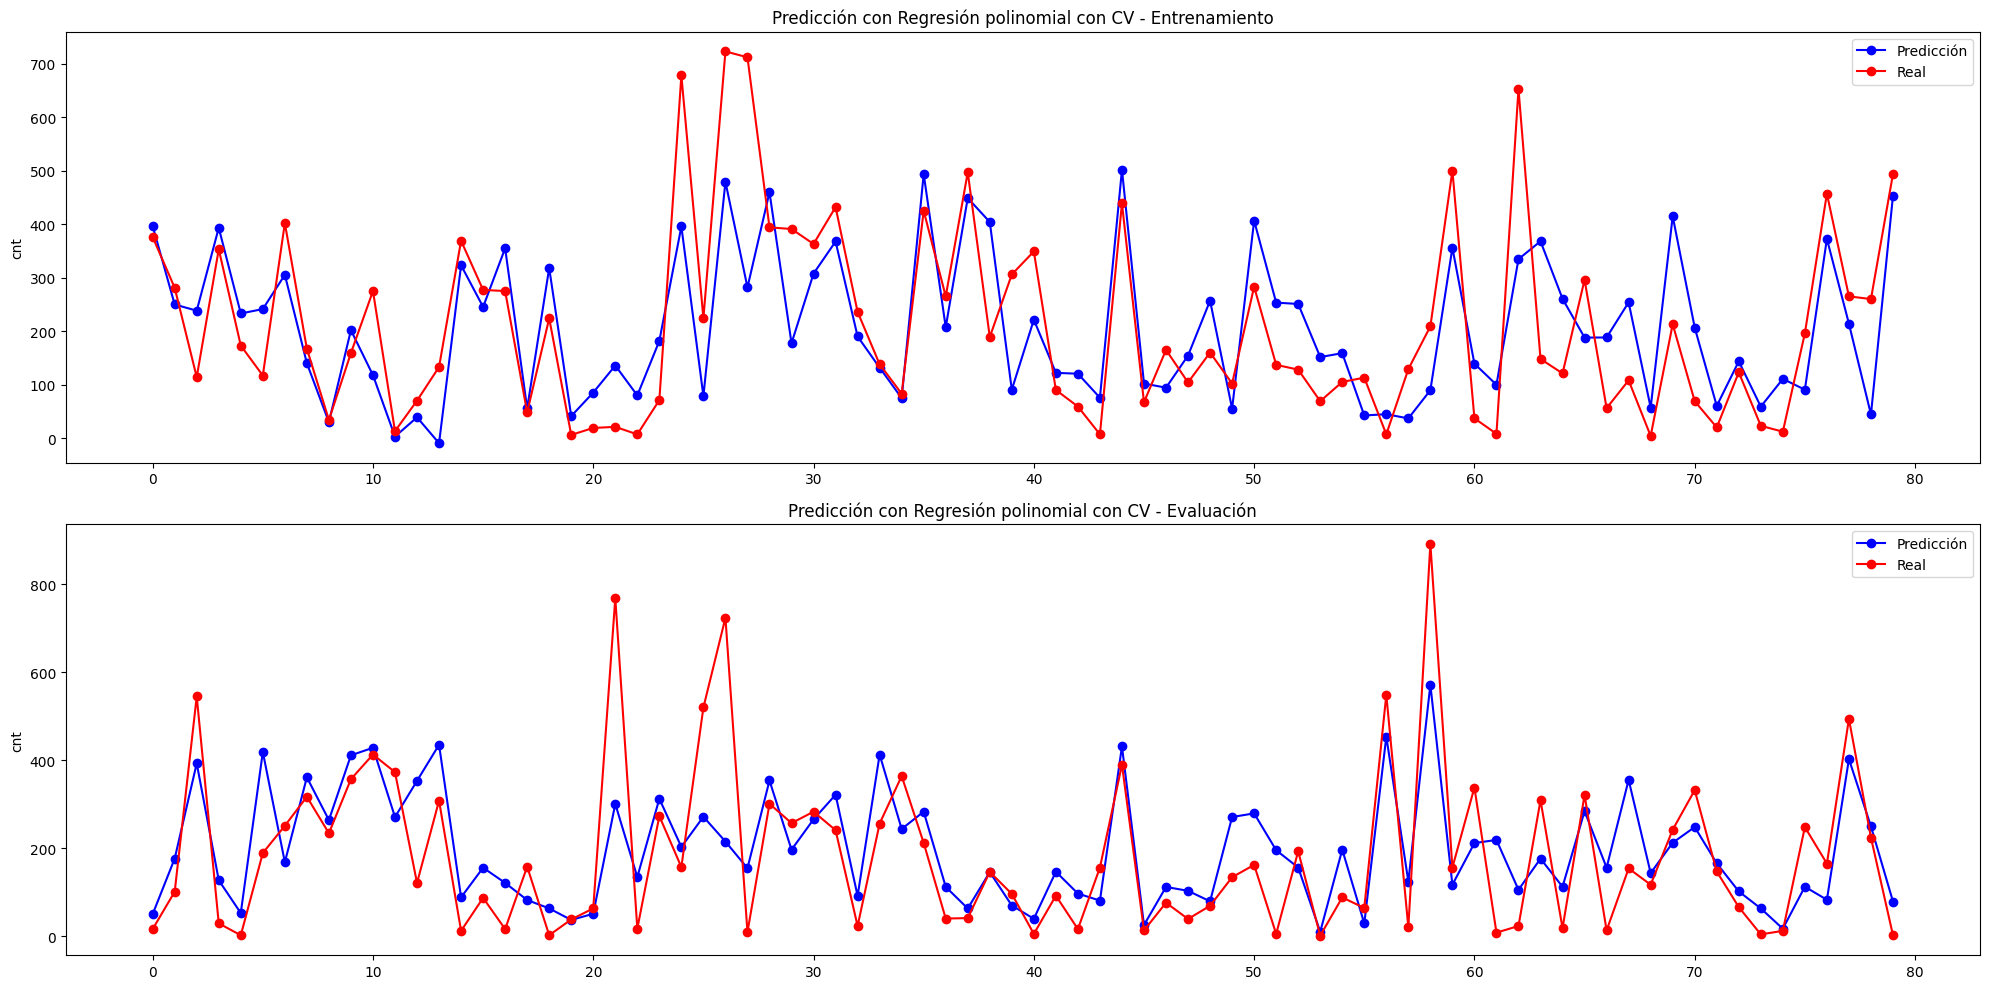

In [307]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión polinomial con CV - Entrenamiento', ylabel=y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión polinomial con CV - Evaluación', ylabel=y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()

In [308]:
poly_model = best_model['regression']
trans_df = best_model['transform'].transform(X_test)
fake_df = best_model['polinomial'].transform(trans_df)

cat_names = best_model['transform'].transformers_[1][1].get_feature_names_out()
num_names = best_model['transform'].transformers_[0][2]#.feature_names_in_
col_names = list(num_names) + list(cat_names)

print(f'Intercepto: {poly_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [poly_model.intercept_] + list(poly_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Intercepto: -62.24087872420722


Variable     Parámetro
0              Intercepto -6.224088e+01
1                 weekday -1.334219e-09
2                    temp -5.135540e+01
3                   atemp -2.764327e+03
4                     hum  3.285219e+03
5               windspeed -1.179519e+02
6             season_Fall  3.781255e+02
7           season_Spring  1.191481e+01
8           season_Summer -6.883152e+01
9           season_Winter  4.690227e+01
10       weathersit_Clear  1.001444e+01
11  weathersit_Heavy Rain -1.728574e+01
12  weathersit_Light Rain  1.591706e+01
13        weathersit_Mist  5.634430e+01
14    time_of_day_Evening -5.497561e+01
15    time_of_day_Morning -1.780343e+01
16      time_of_day_Night  7.589510e+00

## 2.2 Regreión Lineal con Regularización L1

In [309]:
estimators_lasso = [
        ('transform',preprocessor),
        ('lasso', Lasso(alpha=8))
]

pipe_lasso = Pipeline(estimators_lasso)

pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bde041cbe50>),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bddf119f890>)])),
                ('lasso', Lasso(alpha=8))])

### Mejor modelo

In [310]:
estimators_best = [
        ('transform', preprocessor),
        ('regression', Lasso())
]

pipe_best = Pipeline(estimators_best)

# Parametros de la busqueda
parameters = {
              'regression__alpha': [1,2,3,4,5],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'transform__cat': [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0)]
              }

grid_search = GridSearchCV(pipe_best, parameters, verbose=2, scoring='neg_root_mean_squared_error', cv=5)

In [311]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.2s
[CV] END regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.2s
[CV] END regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.2s
[CV] END regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.2s
[CV] END regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); to

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, 

CPU times: user 16.7 s, sys: 4.34 s, total: 21.1 s
Wall time: 12.9 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bde041cbe50>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bddf119f890>)])),
                                       ('regression', Lasso())]),
             param_grid={'regression__alpha': [1, 2, 3, 4, 5],
                         'transform__cat': [OneHotEncoder(handle_unknown='ignore'),
                                            OrdinalEncoder(handle_unknown='use_encoded_value',
                                                           unknown_value=0)],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [312]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.126683      0.029734         0.019571        0.012215   
1        0.125466      0.016927         0.013821        0.002138   
2        0.114952      0.008195         0.017382        0.003303   
3        0.020122      0.008422         0.000000        0.000000   
4        0.012655      0.002778         0.000000        0.000000   
5        0.008663      0.000678         0.000000        0.000000   
6        0.121841      0.026662         0.015509        0.002285   
7        0.072459      0.036067         0.020817        0.007536   
8        0.115653      0.013524         0.015331        0.003426   
9        0.021057      0.008271         0.000000        0.000000   
10       0.012197      0.001234         0.000000        0.000000   
11       0.007714      0.000238         0.000000        0.000000   
12       0.112369      0.030103         0.015658        0.000683   
13       0.075189      0.021422         0.022675        0.006371   
14       0.116919      0.035362         0.019470        0.008886   
15       0.027854      0.020913         0.000000        0.000000   
16       0.014491      0.001661         0.000000        0.000000   
17       0.009687      0.000347         0.000000        0.000000   
18       0.384399      0.255941         0.026492        0.008253   
19       0.132922      0.078297         0.024236        0.007494   
20       0.110637      0.014030         0.018212        0.007774   
21       0.014940      0.002720         0.000000        0.000000   
22       0.011247      0.001979         0.000000        0.000000   
23       0.007196      0.000208         0.000000        0.000000   
24       0.093083      0.027900         0.013256        0.003106   
25       0.098340      0.023237         0.024087        0.008081   
26       0.110594      0.028934         0.017642        0.006927   
27       0.021067      0.009428         0.000000        0.000000   
28       0.010284      0.000262         0.000000        0.000000   
29       0.007735      0.000990         0.000000        0.000000   

    param_regression__alpha  \
0                         1   
1                         1   
2                         1   
3                         1   
4                         1   
5                         1   
6                         2   
7                         2   
8                         2   
9                         2   
10                        2   
11                        2   
12                        3   
13                        3   
14                        3   
15                        3   
16                        3   
17                        3   
18                        4   
19                        4   
20                        4   
21                        4   
22                        4   
23                        4   
24                        5   
25                        5   
26                        5   
27                        5   
28                        5   
29                        5   

                                 param_transform__cat param_transform__num  \
0              OneHotEncoder(handle_unknown='ignore')     StandardScaler()   
1              OneHotEncoder(handle_unknown='ignore')       MinMaxScaler()   
2              OneHotEncoder(handle_unknown='ignore')          passthrough   
3   OrdinalEncoder(handle_unknown='use_encoded_val...     StandardScaler()   
4   OrdinalEncoder(handle_unknown='use_encoded_val...       MinMaxScaler()   
5   OrdinalEncoder(handle_unknown='use_encoded_val...          passthrough   
6              OneHotEncoder(handle_unknown='ignore')     StandardScaler()   
7              OneHotEncoder(handle_unknown='ignore')       MinMaxScaler()   
8              OneHotEncoder(handle_unknown='ignore')          passthrough   
9   OrdinalEncoder(handle_unknown='use_encoded_val...     StandardScaler()   
10  OrdinalEncoder(handle_unknown='use_encoded_val...       MinMaxScaler() 

In [313]:
grid_search.best_params_

{'regression__alpha': 1,
 'transform__cat': OneHotEncoder(handle_unknown='ignore'),
 'transform__num': StandardScaler()}

### Evaluación final

In [314]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([ -6.31689443,  16.32832407, 149.67223131, ..., -39.56398042,
       146.14255171, 160.7828645 ])

In [315]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("RMSE: %.2f" % root_mean_squared_error(y_train, y_pred_train))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Lasso con evaluación ------------')
print("RMSE: %.2f" % root_mean_squared_error(y_test, y_pred_test))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

las1 = root_mean_squared_error(y_test, y_pred_test)
las2 = r2_score(y_test, y_pred_test)
las3 = ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1))

------------ Regresión Lasso con entrenamiento------------
RMSE: 136.95
R2-score: 0.43204
Adj R2-score: 0.43171
------------ Regresión Lasso con evaluación ------------
RMSE: 136.91
R2-score: 0.42177
Adj R2-score: 0.42043


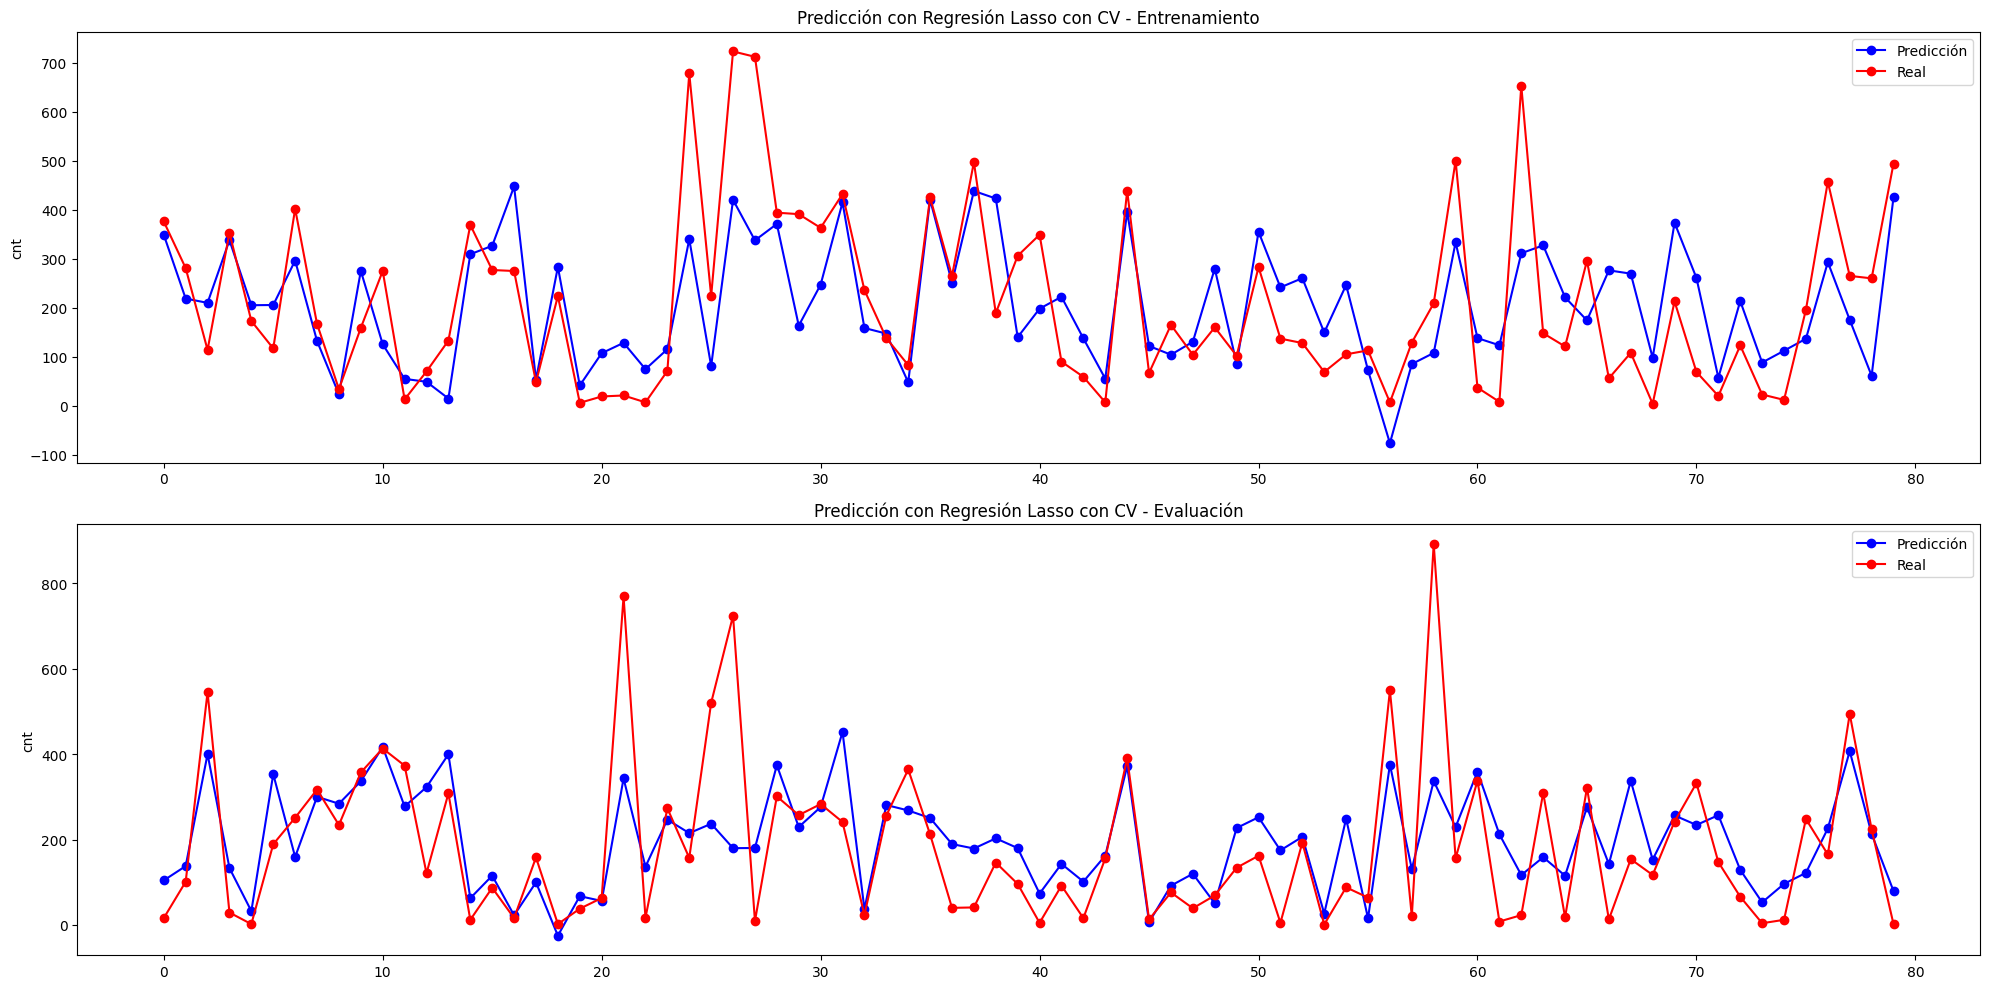

In [316]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión Lasso con CV - Entrenamiento', ylabel=y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión Lasso con CV - Evaluación', ylabel=y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()

In [317]:
lasso_model = best_model['regression']
trans_df = best_model['transform'].transform(X_test)

cat_names = best_model['transform'].transformers_[1][1].get_feature_names_out()
num_names = best_model['transform'].transformers_[0][2]#.feature_names_in_
col_names = list(num_names) + list(cat_names)

print(f'Intercepto: {lasso_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [lasso_model.intercept_] + list(lasso_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Intercepto: 190.89392328209283


Variable   Parámetro
0              Intercepto  190.893923
1                 weekday    3.412752
2                    temp   17.673816
3                   atemp   42.256492
4                     hum  -30.634250
5               windspeed   -0.040059
6             season_Fall   45.007430
7           season_Spring   12.792096
8           season_Summer   -0.000000
9           season_Winter   -8.626710
10       weathersit_Clear    3.082381
11  weathersit_Heavy Rain    0.000000
12  weathersit_Light Rain  -23.831095
13        weathersit_Mist   -0.000000
14    time_of_day_Evening   82.115771
15    time_of_day_Morning   -0.000000
16      time_of_day_Night  -99.827704

# Tabla comparativa de rendimiento

In [318]:
# Crear el DataFrame con los resultados
df_comparacion = pd.DataFrame({
    "Métrica": ["RMSE", "R² Score", "Adj R² Score"],
    "Regresión Polinomial": [pol1, pol2, pol3],
    "Regresión Lasso": [las1, las2, las3]
})

# Mostrar la tabla
display(df_comparacion)


Métrica  Regresión Polinomial  Regresión Lasso
0          RMSE            129.371619       136.912713
1      R² Score              0.483714         0.421771
2  Adj R² Score              0.482521         0.420435

## Variables más impotantes

In [319]:
coef = coef.reindex(coef["Parámetro"].abs().sort_values(ascending=False).index)
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Variable   Parámetro
0              Intercepto  190.893923
16      time_of_day_Night  -99.827704
14    time_of_day_Evening   82.115771
6             season_Fall   45.007430
3                   atemp   42.256492
4                     hum  -30.634250
12  weathersit_Light Rain  -23.831095
2                    temp   17.673816
7           season_Spring   12.792096
9           season_Winter   -8.626710
1                 weekday    3.412752
10       weathersit_Clear    3.082381
5               windspeed   -0.040059
11  weathersit_Heavy Rain    0.000000
13        weathersit_Mist   -0.000000
15    time_of_day_Morning   -0.000000
8           season_Summer   -0.000000

Con base al modelo Lasso las variables más importantes son si es de noche, seguido de si es tarde y si se esta en otoño. En la tabla superior de igual manera se ve en orden de magnitud de los parámetros.

# 3. Preguntas
## • ¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?

El grado seleccionado fue de 3 grados

## •	¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?

El alpha seleccionado utilizando la técnica de validación fue de 1.

## •	A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?

Según la tabla comparativa el modelo de Regresión Polinomial ofrece un mejor rendimiento en el conjunto de prueba, al tener un RMSE más bajo, y mayor capacidad explicativa, dado los mayores valores de $R^2$ obtenidos.

Pues el RMSE indica que el error promedio es menor, mientras que el $R^2$ muestran que la regresión se ajusta el 48.73% de la variabilidad de los datos.

## •	¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.

Las variables seleccionadas fueron el tiempo de la noche y de la tarde, las cuales cobran sentido al ser horas en las que no sería de preferencia ir en bicicleta sea por las condiciones ambientales, peligro, o necesidad en el momento. Así mismo la estación de otoño parece tener una gran afluencia, esto podría ser tal vez por una gran cantidad foliage que evita el uso adecuado de la bicicleta.

